# HW6 Problem 2 & 6 Implementation

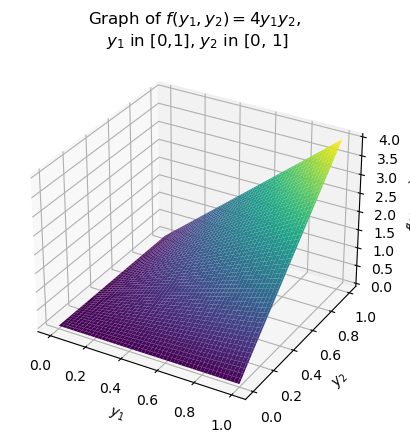

In [7]:
# Q2b

import numpy as np
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

# Create a meshgrid for y1 and y2
y1 = np.linspace(0, 1, 100)
y2 = np.linspace(0, 1, 100)
Y1, Y2 = np.meshgrid(y1, y2)

# Compute the function values
F = 4 * Y1 * Y2

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(Y1, Y2, F, cmap='viridis')

# Label the axes
ax.set_xlabel('$y_1$')
ax.set_ylabel('$y_2$')
ax.set_zlabel('$f(y_1, y_2)$')

# Set the title
ax.set_title('Graph of $f(y_1, y_2) = 4y_1y_2$, \n $y_1$ in [0,1], $y_2$ in [0, 1]')

# Show the plot
plt.savefig('hw6_2b.png')
plt.show()

## Problem 6: LLN Implementation

(b) Let $Z = \frac{X}{Y}$ where $X,Y$ are independent standard normal random variables. Take 1000 samples of $Z$, and plot those as a histogram against the PDF of $S$. Comment on how the two compare.

**Answer:** We see that the pdf of $S$ approximates the histogram of $\frac{X}{Y}$.

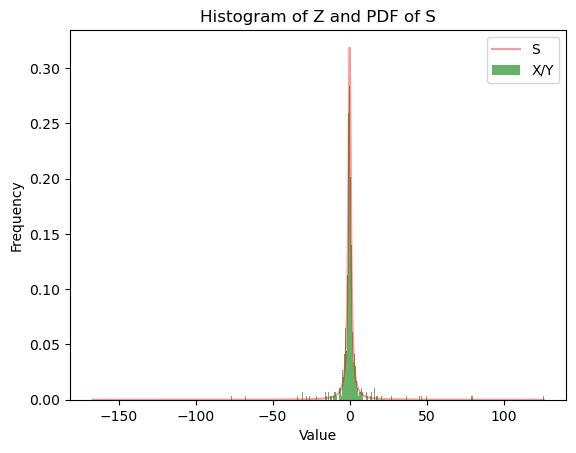

In [21]:
# S is a Cauchy continuous random variable.
from scipy.stats import cauchy

np.random.seed(42)
X = np.random.standard_normal(1000)
Y = np.random.standard_normal(1000)
Z = X / Y

# plot PDF of S
x_vals = np.linspace(min(Z), max(Z), 1000)
plt.plot(x_vals, cauchy.pdf(x_vals), alpha=0.4, color='r', label='S')

# plot histogram
plt.hist(Z, bins=1000, density=True, alpha=0.6, color='g', label='X/Y')

plt.title('Histogram of Z and PDF of S')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

(c) Simulate an empirical mean $\displaystyle\hat{\mathbb{E}}[Z]\approx\frac{1}{n}\sum_{i=1}^n Z_i$ for $n \in \{50, 500, 5000\}$ (we can simulate further if we please). You can do this by first sampling (and saving) 5000 samples into an array or list, then computing the average on the first 50 samples, the first 500 samples, and the first 5000 samples. You can repeat this process 10 times (i.e. run 10 trials). Report your results. Do the averages seem to converge? 

In [26]:
# Run 10 trials
trials = 10
sample_sizes = [50, 500, 5000]
results = [[] for i in range(trials)]

for trial in range(trials):
    X = np.random.standard_normal(5000)
    Y = np.random.standard_normal(5000)
    Z = X / Y
    for n in sample_sizes:
        empirical_mean = np.mean(Z[:n])
        results[trial].append(empirical_mean)

# Report the results
print(f"Empirical means for trials=10 (n=50, 500, 5000):")
for result in results:
    print(result)

Empirical means for trials=10 (n=50, 500, 5000):
[1.8599467762978685, 4.318043677901301, -5.460053996789937]
[1.161291139860428, -1.4909832977685007, 0.27450044487879166]
[-3.300031992054536, 1.2032150758598381, -0.2514451473886043]
[-1.5721575967005676, -0.4153435367024438, -0.5865162878147604]
[0.6732655055375283, 1.0063412602908484, -2.229364765119846]
[2.0355107945631854, 0.5869991321091474, 14.386625935712955]
[0.20526950540541036, -1.1993015404421268, 0.9108284961717847]
[10.86636492887533, 3.5362440723464563, -1.2991676778276753]
[0.6881460577969905, 0.4583395704130784, -0.05876896394039381]
[-1.6028080206696924, -0.13406080704675605, 0.6050981906687509]


The average does not seem to converge.